# Comparing Investment Strategies

## Trevor Nguyen and Bondith Sovann

In [1]:
# Import libraries
import yfinance as yf
import pandas as pd
import talib as ta
import matplotlib.pyplot as plt

In [2]:
# Define the parameters
initial_investment = 1000 # initial investment amount per month
test_period_years = 30 # test period in years
monthly_investments = 12 * test_period_years # total number of monthly investments

In [3]:
# Download the historical data for the asset
stock = yf.Ticker("KO") # Coca-Cola Company
data = stock.history(period = "30y")

In [4]:
# Preview the data
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1993-12-20 00:00:00-05:00,5.130524,5.160615,5.115478,5.160615,3674400,0.0,0.0
1993-12-21 00:00:00-05:00,5.160614,5.235842,5.130523,5.235842,4787600,0.0,0.0
1993-12-22 00:00:00-05:00,5.235842,5.311069,5.235842,5.296024,6561200,0.0,0.0
1993-12-23 00:00:00-05:00,5.296024,5.311069,5.190705,5.235842,6054800,0.0,0.0
1993-12-27 00:00:00-05:00,5.250884,5.326112,5.250884,5.326112,3681600,0.0,0.0


In [5]:
data.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-12-12 00:00:00-05:00,59.200001,59.419998,58.900002,59.419998,12899000,0.0,0.0
2023-12-13 00:00:00-05:00,59.450001,60.020000,59.259998,59.930000,16196800,0.0,0.0
2023-12-14 00:00:00-05:00,59.970001,60.040001,58.770000,59.040001,22478300,0.0,0.0
2023-12-15 00:00:00-05:00,58.830002,59.169998,57.799999,58.599998,65172300,0.0,0.0
2023-12-18 00:00:00-05:00,58.799999,59.490002,58.619999,59.059898,10064644,0.0,0.0


### Annual Percent Return:
\begin{equation}
\text{Annual Percent Return} =
(\frac{\text{Final Equity}}{\text{Initial Equity}})^\frac{1}{\text{Number of Years}} - 1
   \end{equation}


In [6]:
# Calculate Annual Percent Return
def calculate_annual_percent_return(initial_equity, final_equity, years):
  if initial_equity == 0:
    return 0 # Return 0 if initial equity is zero to avoid division by zero

  return ((final_equity / initial_equity) ** (1 / years)) - 1

In [7]:
# Buy and Hold strategy
def buy_and_hold_strategy(stock_data, investment_per_month):
  equity = 0
  initial_investment = investment_per_month
  equity_over_time = []
  monthly_date = []

  for i in range(0, len(stock_data), 21): # Assuming monthly data
    investment = investment_per_month
    equity += investment
    equity_over_time.append(equity + investment_per_month * (1 + stock_data['Close'].iloc[i] / stock_data['Close'].iloc[0]))
    monthly_date.append(stock_data.index[i])

  initial_equity = initial_investment
  final_equity = equity_over_time[-1]

  annual_return = calculate_annual_percent_return(initial_equity, final_equity, len(stock_data) / 252)  # Assuming 252 trading days in a year

  return equity_over_time, annual_return * 100, monthly_date

In [8]:
# Active Trading strategy
def active_trading_strategy(stock_data, investment_per_month, sma_window_short = 50, sma_window_long = 200):
  stock_data['SMA_Short'] = ta.SMA(stock_data['Close'], timeperiod = sma_window_short)
  stock_data['SMA_Long'] = ta.SMA(stock_data['Close'], timeperiod = sma_window_long)

  equity = 0
  initial_investment = investment_per_month
  in_market = False

  equity_over_time = [];

  for i in range(len(stock_data)):
    if stock_data['SMA_Short'].iloc[i] > stock_data['SMA_Long'].iloc[i]:
      # Buy signal
      if not in_market:
        investment = investment_per_month
        equity += investment
        in_market = True
    else:
      # Sell signal
      if in_market:
        investment = investment_per_month
        equity -= investment
        in_market = False
    equity_over_time.append(equity + investment_per_month * (1 + stock_data['Close'].iloc[i] / stock_data['Close'].iloc[0]))

  initial_equity = initial_investment
  final_equity = equity_over_time[-1]

  annual_return = calculate_annual_percent_return(initial_equity, final_equity, len(stock_data) / 252)  # Assuming 252 trading days in a year

  return equity_over_time, annual_return * 100

In [9]:
# Output results
investment_per_month = 1000

buy_and_hold_equity_over_time, buy_and_hold_annual_return, monthly_date = buy_and_hold_strategy(data, investment_per_month)
active_trader_equity_over_time, active_trading_annual_return = active_trading_strategy(data, investment_per_month)

print("Buy and Hold Strategy:")
print(f"Total Equity: ${buy_and_hold_equity_over_time[-1]:.2f}")
print(f"Annual Percent Return: {buy_and_hold_annual_return:.2f}%")

print("\nActive Trading Strategy:")
print(f"Total Equity: ${active_trader_equity_over_time[-1]:.2f}")
print(f"Annual Percent Return: {active_trading_annual_return:.2f}%")

Buy and Hold Strategy:
Total Equity: $372194.40
Annual Percent Return: 21.83%

Active Trading Strategy:
Total Equity: $12444.35
Annual Percent Return: 8.78%


In [10]:
# Calculate the Simple Moving Average (SMA)
data["sma_200"] = ta.SMA(data["Close"], timeperiod = 200)

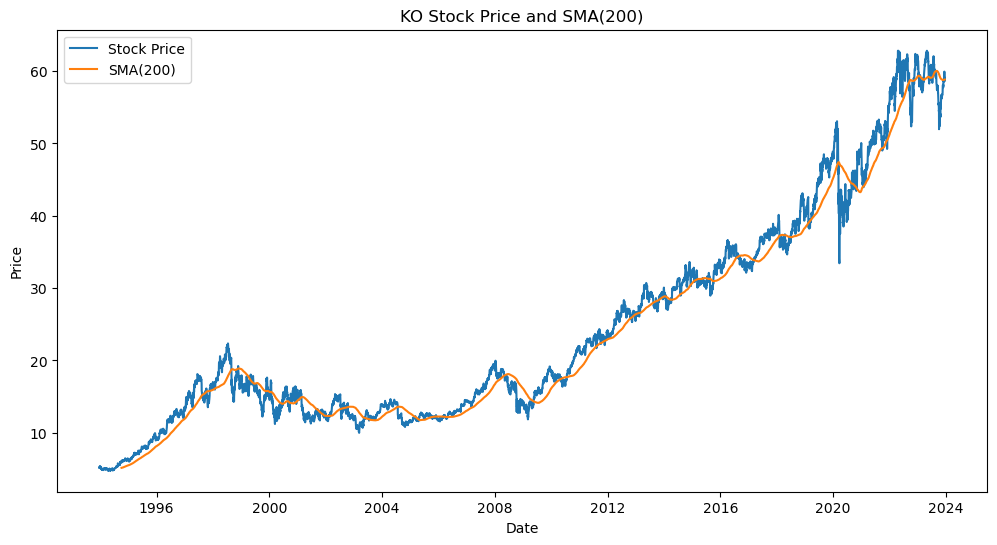

In [11]:
# Plot of Stock Price
plt.figure(figsize = (12, 6))
plt.plot(data.index, data["Close"], label = "Stock Price")
plt.plot(data.index, data["sma_200"], label = "SMA(200)")
plt.title("KO Stock Price and SMA(200)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

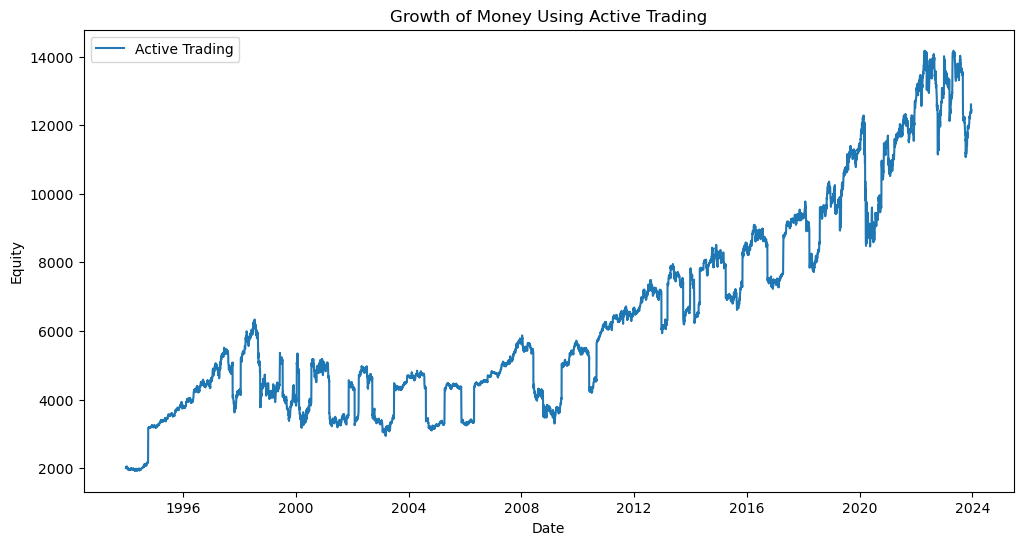

In [12]:
# Plot the growth of money for Active Trading
plt.figure(figsize = (12, 6))
plt.plot(data.index, active_trader_equity_over_time, label = "Active Trading")
plt.title("Growth of Money Using Active Trading")
plt.xlabel("Date")
plt.ylabel("Equity")
plt.legend()
plt.show()

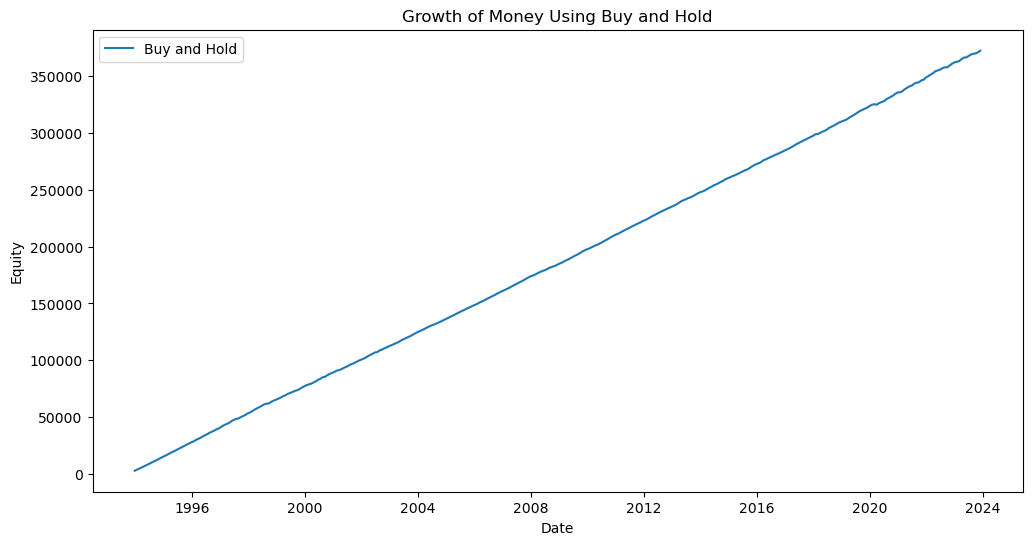

In [13]:
# Plot the growth of money Buy and Hold
plt.figure(figsize = (12, 6))
plt.plot(monthly_date, buy_and_hold_equity_over_time, label = "Buy and Hold")
plt.title("Growth of Money Using Buy and Hold")
plt.xlabel("Date")
plt.ylabel("Equity")
plt.legend()
plt.show()